This data contains information on Carbon Emissions in India.

**It contains columns specifying CO, CH4, and CO2 emissions.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityachandavale/carbon-emission-india")

print("Path to dataset files:", path)

100%|██████████| 741/741 [00:00<00:00, 648kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adityachandavale/carbon-emission-india/versions/1


In [3]:
path = '/root/.cache/kagglehub/datasets/adityachandavale/carbon-emission-india/versions/1'

files = os.listdir(path)
print(files)

path = os.path.join(path, files[0])

['CarbonEmissionIndia.csv']


In [4]:
carbon = pd.read_csv(path)
carbon.head(10)

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.17,27.18,16.97
1,Arunachal,405.90,17.43,25.82
2,Assam,340.91,16.63,21.29
3,Bihar,179.01,8.83,9.59
4,Chattisgarh,1963.88,17.56,22.37
5,Goa,2662.51,23.12,7.62
6,Gujarat,1310.58,24.01,12.26
7,Haryana,1381.86,17.90,21.57
8,Himachal Pradesh,784.16,16.98,18.28
9,Jammu & Kashmir,509.03,15.59,14.42


In [5]:
carbon.describe()

,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
count,28.000000,28.000000,28.000000
mean,894.401071,18.293214,16.549286
std,547.619397,5.258928,6.599384
min,179.010000,8.830000,4.520000
25%,505.025000,14.847500,11.830000
50%,771.625000,17.495000,15.690000
75%,1058.092500,23.235000,20.232500
max,2662.510000,27.900000,33.380000


#**Plotting**

In [6]:
states = carbon['States']
co2 = carbon['per capita CO2 (kg per person)']
co = carbon['per capita CO (kg per person)']
ch4 = carbon['per capita CH4 (kg per person)']

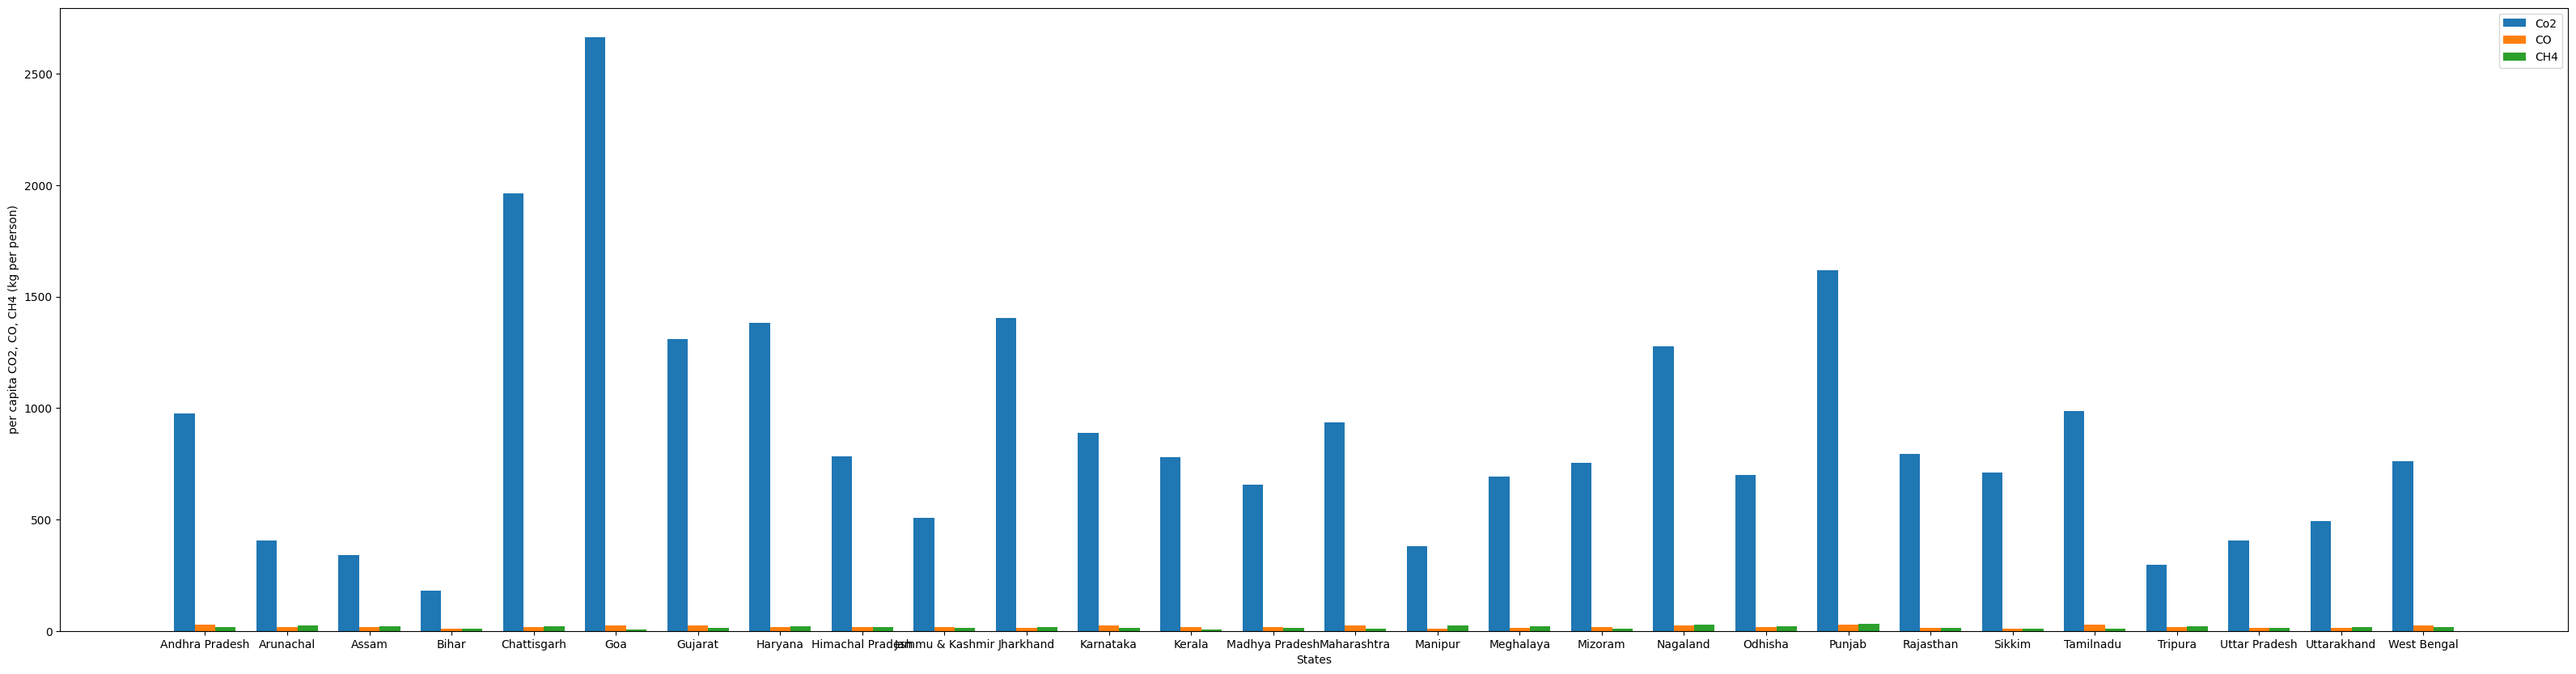

In [7]:
# Grouped Bar Chart
x = np.arange(len(states))
width = 0.25
plt.figure(figsize=(40,10))

plt.bar(x-width, co2, width=width)
plt.bar(x, co, width=width)
plt.bar(x+width, ch4, width=width)
plt.xlabel('States')
plt.ylabel('per capita CO2, CO, CH4 (kg per person)')
plt.xticks(x, states)
plt.legend(['Co2', 'CO', 'CH4'])
plt.show()

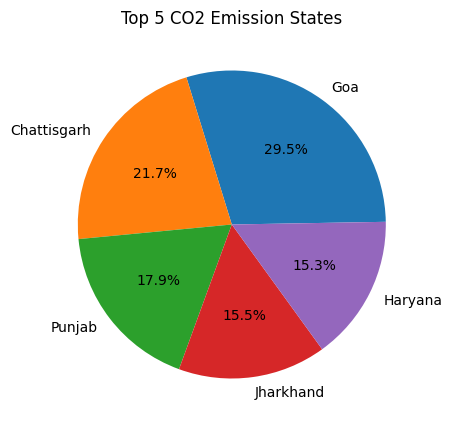

In [8]:
#Pie Chart for CO2
co2_df = pd.DataFrame(carbon)
co2_df = co2_df.nlargest(5, 'per capita CO2 (kg per person)')
plt.figure(figsize=(10, 5))
plt.pie(co2_df['per capita CO2 (kg per person)'], labels=co2_df['States'], autopct='%1.1f%%', startangle=1)
plt.title('Top 5 CO2 Emission States')
plt.show()

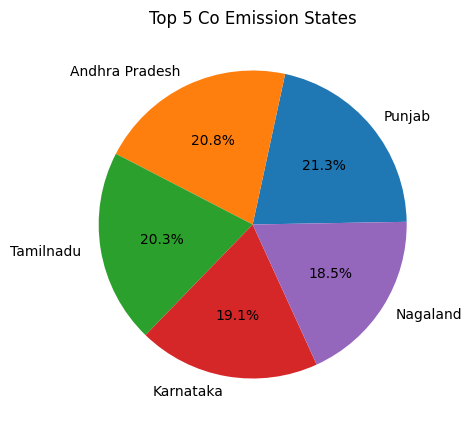

In [9]:
#Pie Chart for top 5 CO Emission
co_df = pd.DataFrame(carbon)
co_df = co_df.nlargest(5, 'per capita CO (kg per person)')
plt.figure(figsize=(10,5))
plt.pie(co_df['per capita CO (kg per person)'], labels=co_df['States'], autopct='%1.1f%%', startangle=1)
plt.title('Top 5 Co Emission States')
plt.show()

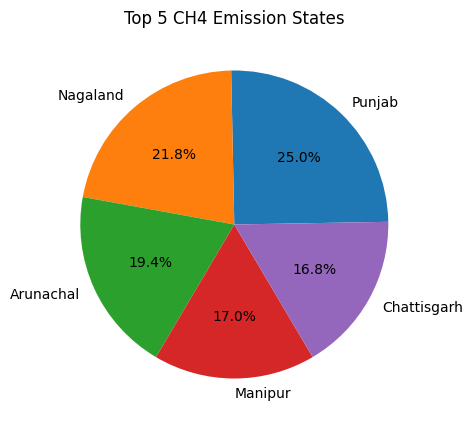

In [10]:
#Pie Chart for Top 5 CH4 Emission
ch4_df = pd.DataFrame(carbon)
ch4_df = ch4_df.nlargest(5, 'per capita CH4 (kg per person)')
plt.figure(figsize=(10,5))
plt.pie(ch4_df['per capita CH4 (kg per person)'], labels=ch4_df['States'], autopct='%1.1f%%', startangle=1)
plt.title('Top 5 CH4 Emission States')
plt.show()

**Observations: -**

Co2 Emission: -
1. Goa
2. Chattisgarh
3. Punjab
4. Jharkhand
5. Haryana

CO Emission: -
1. Punjab
2. AP
3. TN
4. Karnataka
5. Nagaland

CH4 Emission: -
1. Punjab
2. Nagaland
3. Arunachal Pradesh
4. Manipur
5. Chattisgarh

array([[<Axes: title={'center': 'per capita CO2 (kg per person)'}>,
        <Axes: title={'center': 'per capita CO (kg per person)'}>],
       [<Axes: title={'center': 'per capita CH4 (kg per person)'}>,
        <Axes: >]], dtype=object)

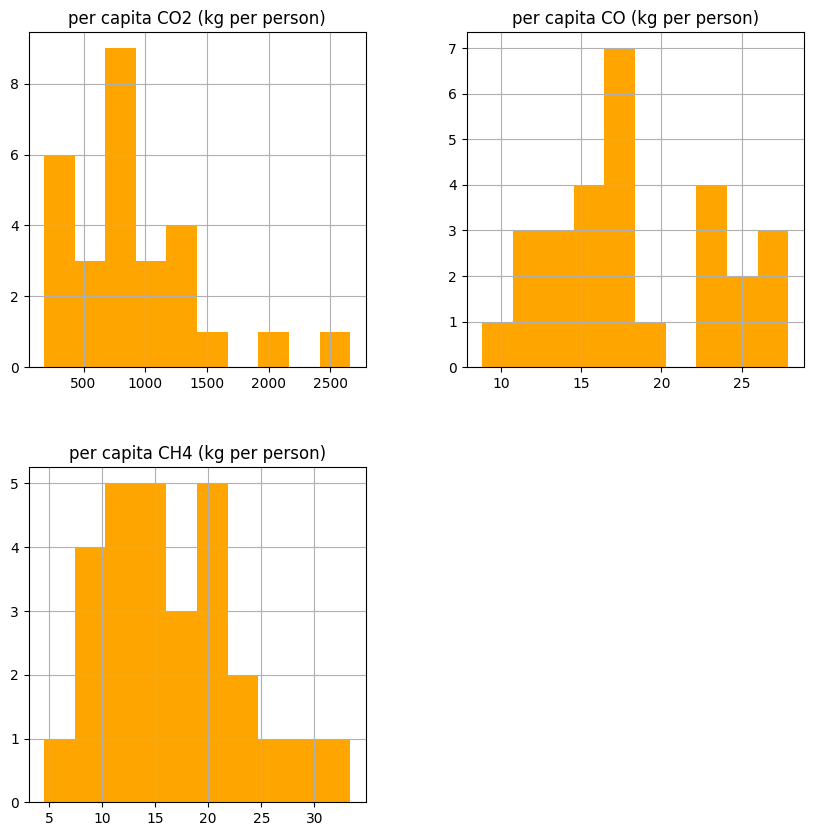

In [11]:
# Visualizing the count for the emission values
carbon.hist(figsize=(10,10), color=['orange'])

#**K Means Clustering**

In [12]:
x1 = carbon.drop(['States'], axis=1)
y1 = carbon['States']

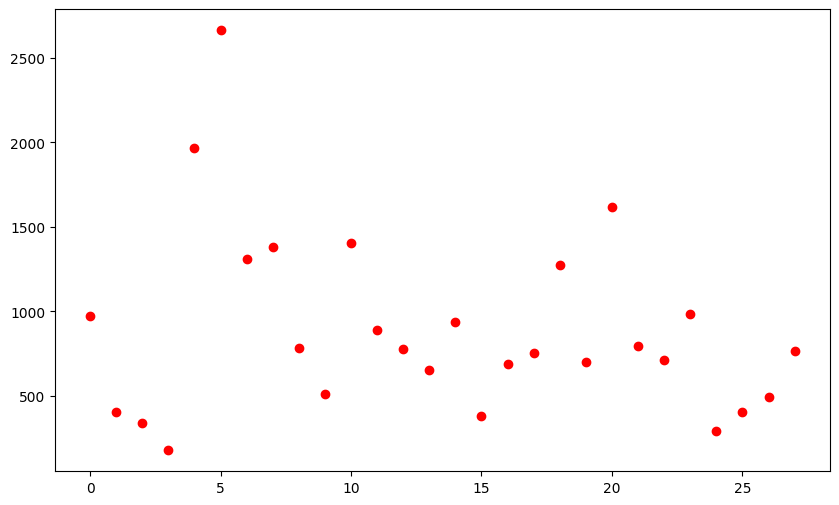

In [13]:
#Scatter Plot to visualize before scaling the data
plt.figure(figsize=(10,6))
x_b = np.arange(len(x1))
y_b = x1.iloc[:, 0]
plt.scatter(x_b,y_b,color='r')

In [14]:
scaler = StandardScaler()
scaler.fit(x1)
x1_std = scaler.transform(x1)

(28, 3)


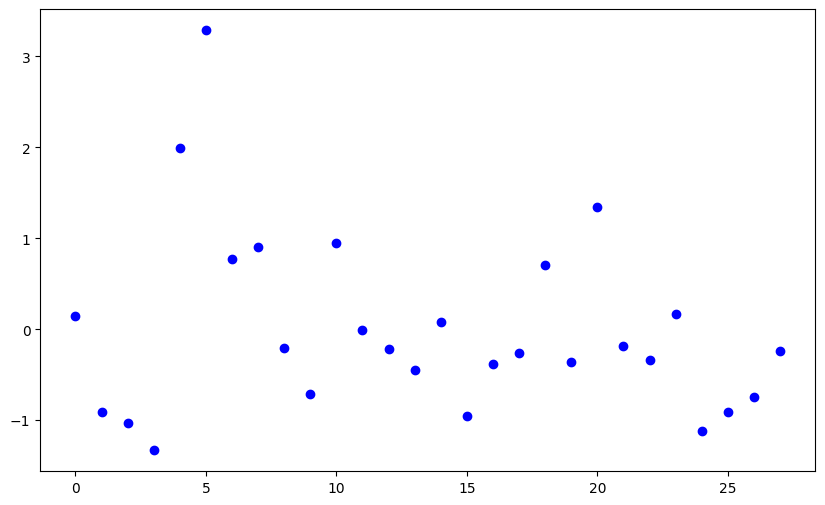

In [15]:
#Scatter Plot to visualize the scaled data
plt.figure(figsize=(10,6))
x = np.arange(len(x1_std))
yy1 = x1_std[:,0]
plt.scatter(x,yy1,color='b')

print(x1_std.shape)

In [16]:
# reducing the dimension to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x1_std)

In [17]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(x_pca)

KMeans(n_clusters=3, random_state=0)

In [18]:
labels = model.labels_
labels

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 0, 1], dtype=int32)

In [19]:
k = model.cluster_centers_
k

array([[-0.93524107,  0.25293782],
       [ 0.86450727, -0.67580605],
       [ 2.25951807,  1.81989963]])

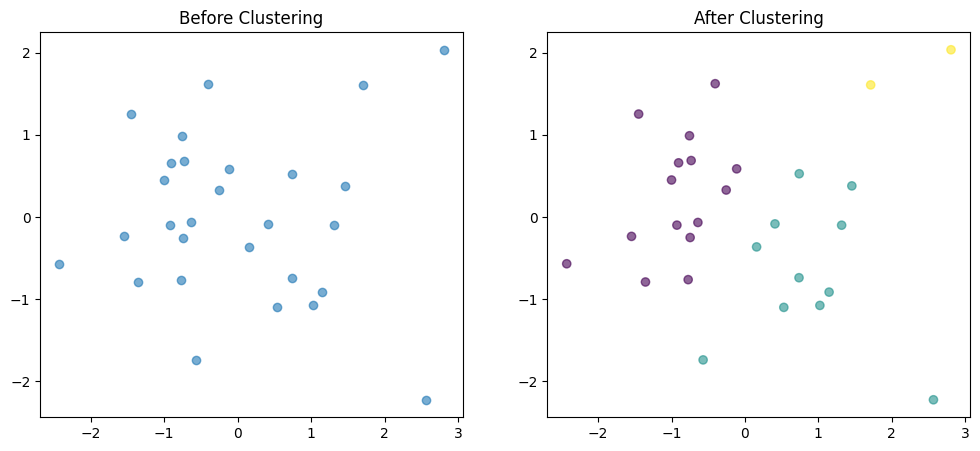

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.6)
axes[1].scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
axes[0].set_title('Before Clustering')
axes[1].set_title('After Clustering')
plt.show()